# Machine Learning
## Programming Assignment 3 
### 3.1  Clustering Movies based on Ratings
#### required imports

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from math import isnan

#### load data

In [2]:
ratings = pd.read_csv("./ml-latest-small/ratings.csv", header=0, sep=",")
movies = pd.read_csv("./ml-latest-small/movies.csv", header=0, sep=",")

#### display data

In [3]:
ratings.head(4)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185


#### (a) convert the data to a dense format

In [4]:
def get_user_area():
    users = {}
    index = 0
    for index in range(0, len(ratings)):
        user = ratings["userId"][index]
        users[user] = index
    return users
        
user_area = get_user_area()


In [5]:
start = -1

In [6]:
def get_rated_movies_and_ratings(user_id):
    m = []
    r = []
    global start
    for i in range(start + 1, user_area[user_id] + 1):
        m.append(ratings["movieId"][i])
        r.append(ratings["rating"][i])
    start = user_area[user_id]
    return m, r

In [7]:
def make_final_frame():
    data_dictionary = {}
    for user in list(user_area.keys())[1:]:
        (m, r) = get_rated_movies_and_ratings(user)
        entry = pd.Series(r, index=m)
        data_dictionary[user] = entry
    return pd.DataFrame(data_dictionary)

In [8]:
data = make_final_frame()
data

,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,...,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,5.0,4.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,4.0,NaN,4.0,NaN,NaN,3.0,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN


#### (b) missing-data imputation with option (i)

In [9]:
average = dict(data.mean())

In [10]:
def add_user_average_rating(user):
    user_average = average[user]
    for (index, rating) in enumerate(data[user]):
        if isnan(rating):
            data[user].iloc[index] = user_average

In [11]:
for user in list(average.keys()):
    add_user_average_rating(user)

In [12]:
data

,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
1,2.55,3.486842,3.568627,4.348039,3.91,3.261364,3.000000,3.866379,4.000000,3.695652,...,3.396552,4.000000,3.500000,3.285714,2.95,3.647059,3.75,3.351351,4.000000,5.000000
2,2.55,3.486842,3.568627,4.348039,3.91,3.261364,3.465909,3.866379,3.755556,3.695652,...,5.000000,3.730769,3.796724,3.000000,2.95,3.647059,3.75,3.351351,3.806452,3.917391
3,2.55,3.486842,3.568627,4.348039,4.00,3.261364,3.465909,3.866379,3.755556,3.695652,...,3.396552,3.730769,3.796724,3.000000,2.95,3.647059,3.75,3.351351,3.806452,3.917391
4,2.55,3.486842,3.568627,4.348039,3.91,3.261364,3.465909,3.866379,3.755556,3.695652,...,3.396552,3.730769,3.796724,3.285714,2.95,3.647059,3.75,3.351351,3.806452,3.917391
5,2.55,3.486842,3.568627,4.348039,3.91,3.261364,3.465909,3.866379,3.755556,3.695652,...,3.396552,3.730769,3.796724,3.000000,2.95,3.647059,3.75,3.351351,3.806452,3.917391
6,2.55,3.486842,3.568627,4.348039,3.91,3.261364,3.465909,3.866379,3.755556,3.695652,...,3.396552,3.730769,4.000000,3.285714,5.00,4.000000,3.75,3.351351,3.806452,3.917391
7,2.55,3.486842,3.568627,4.348039,3.91,3.261364,3.465909,3.866379,3.755556,3.695652,...,3.396552,3.730769,3.796724,3.285714,2.95,3.647059,3.75,3.351351,3.806452,3.917391
8,2.55,3.486842,3.568627,4.348039,3.91,3.261364,3.465909,3.866379,3.755556,3.695652,...,3.396552,3.730769,3.796724,3.285714,2.95,3.647059,3.75,3.351351,3.806452,3.917391
9,2.55,3.486842,3.568627,4.348039,3.91,3.261364,3.465909,3.866379,3.755556,3.695652,...,3.396552,3.730769,3.796724,3.285714,2.95,3.647059,3.75,3.351351,3.806452,3.917391
10,2.55,4.000000,3.568627,4.000000,3.91,3.261364,3.000000,3.866379,3.755556,3.695652,...,3.000000,3.730769,3.796724,3.285714,3.00,3.647059,3.75,3.351351,3.806452,3.917391


#### (c) k-means

In [15]:
# normalize data
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data)
data_normalized = min_max_scaler.transform(data)

In [21]:
value_k = 3
sse = []
for k in range(1, 26):
    km = KMeans(n_clusters=k, random_state=0).fit(data_normalized)
    sse.append(km.inertia_)

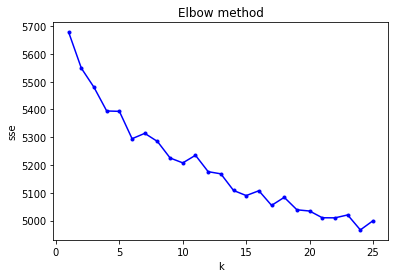

In [25]:
k_values = list(range(1,26))
plt.plot(k_values, sse, color="blue", marker=".")
plt.xlabel("k")
plt.ylabel("sse")
plt.title("Elbow method")
plt.show()

It is not very obvious where the elbow is. It might be at k=10.

#### (d) Hierarchical Agglomerative Clustering

In [35]:
result_clusterings = {}
for k in range(1,26):
    result_clusterings[k] = AgglomerativeClustering(n_clusters=k, linkage="complete")